In [1]:
!apt-get install poppler.utils
#PDF randering Software

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'poppler-utils' for regex 'poppler.utils'
Note, selecting 'xpoppler-utils' for regex 'poppler.utils'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (210 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-

In [2]:
!pip install pdf2image
!pip install easyocr
#OCR read data from images

     |████████████████████████████████| 63.2MB 68kB/s 


In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [4]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [20]:
images = convert_from_path('/content/Sample.pdf')

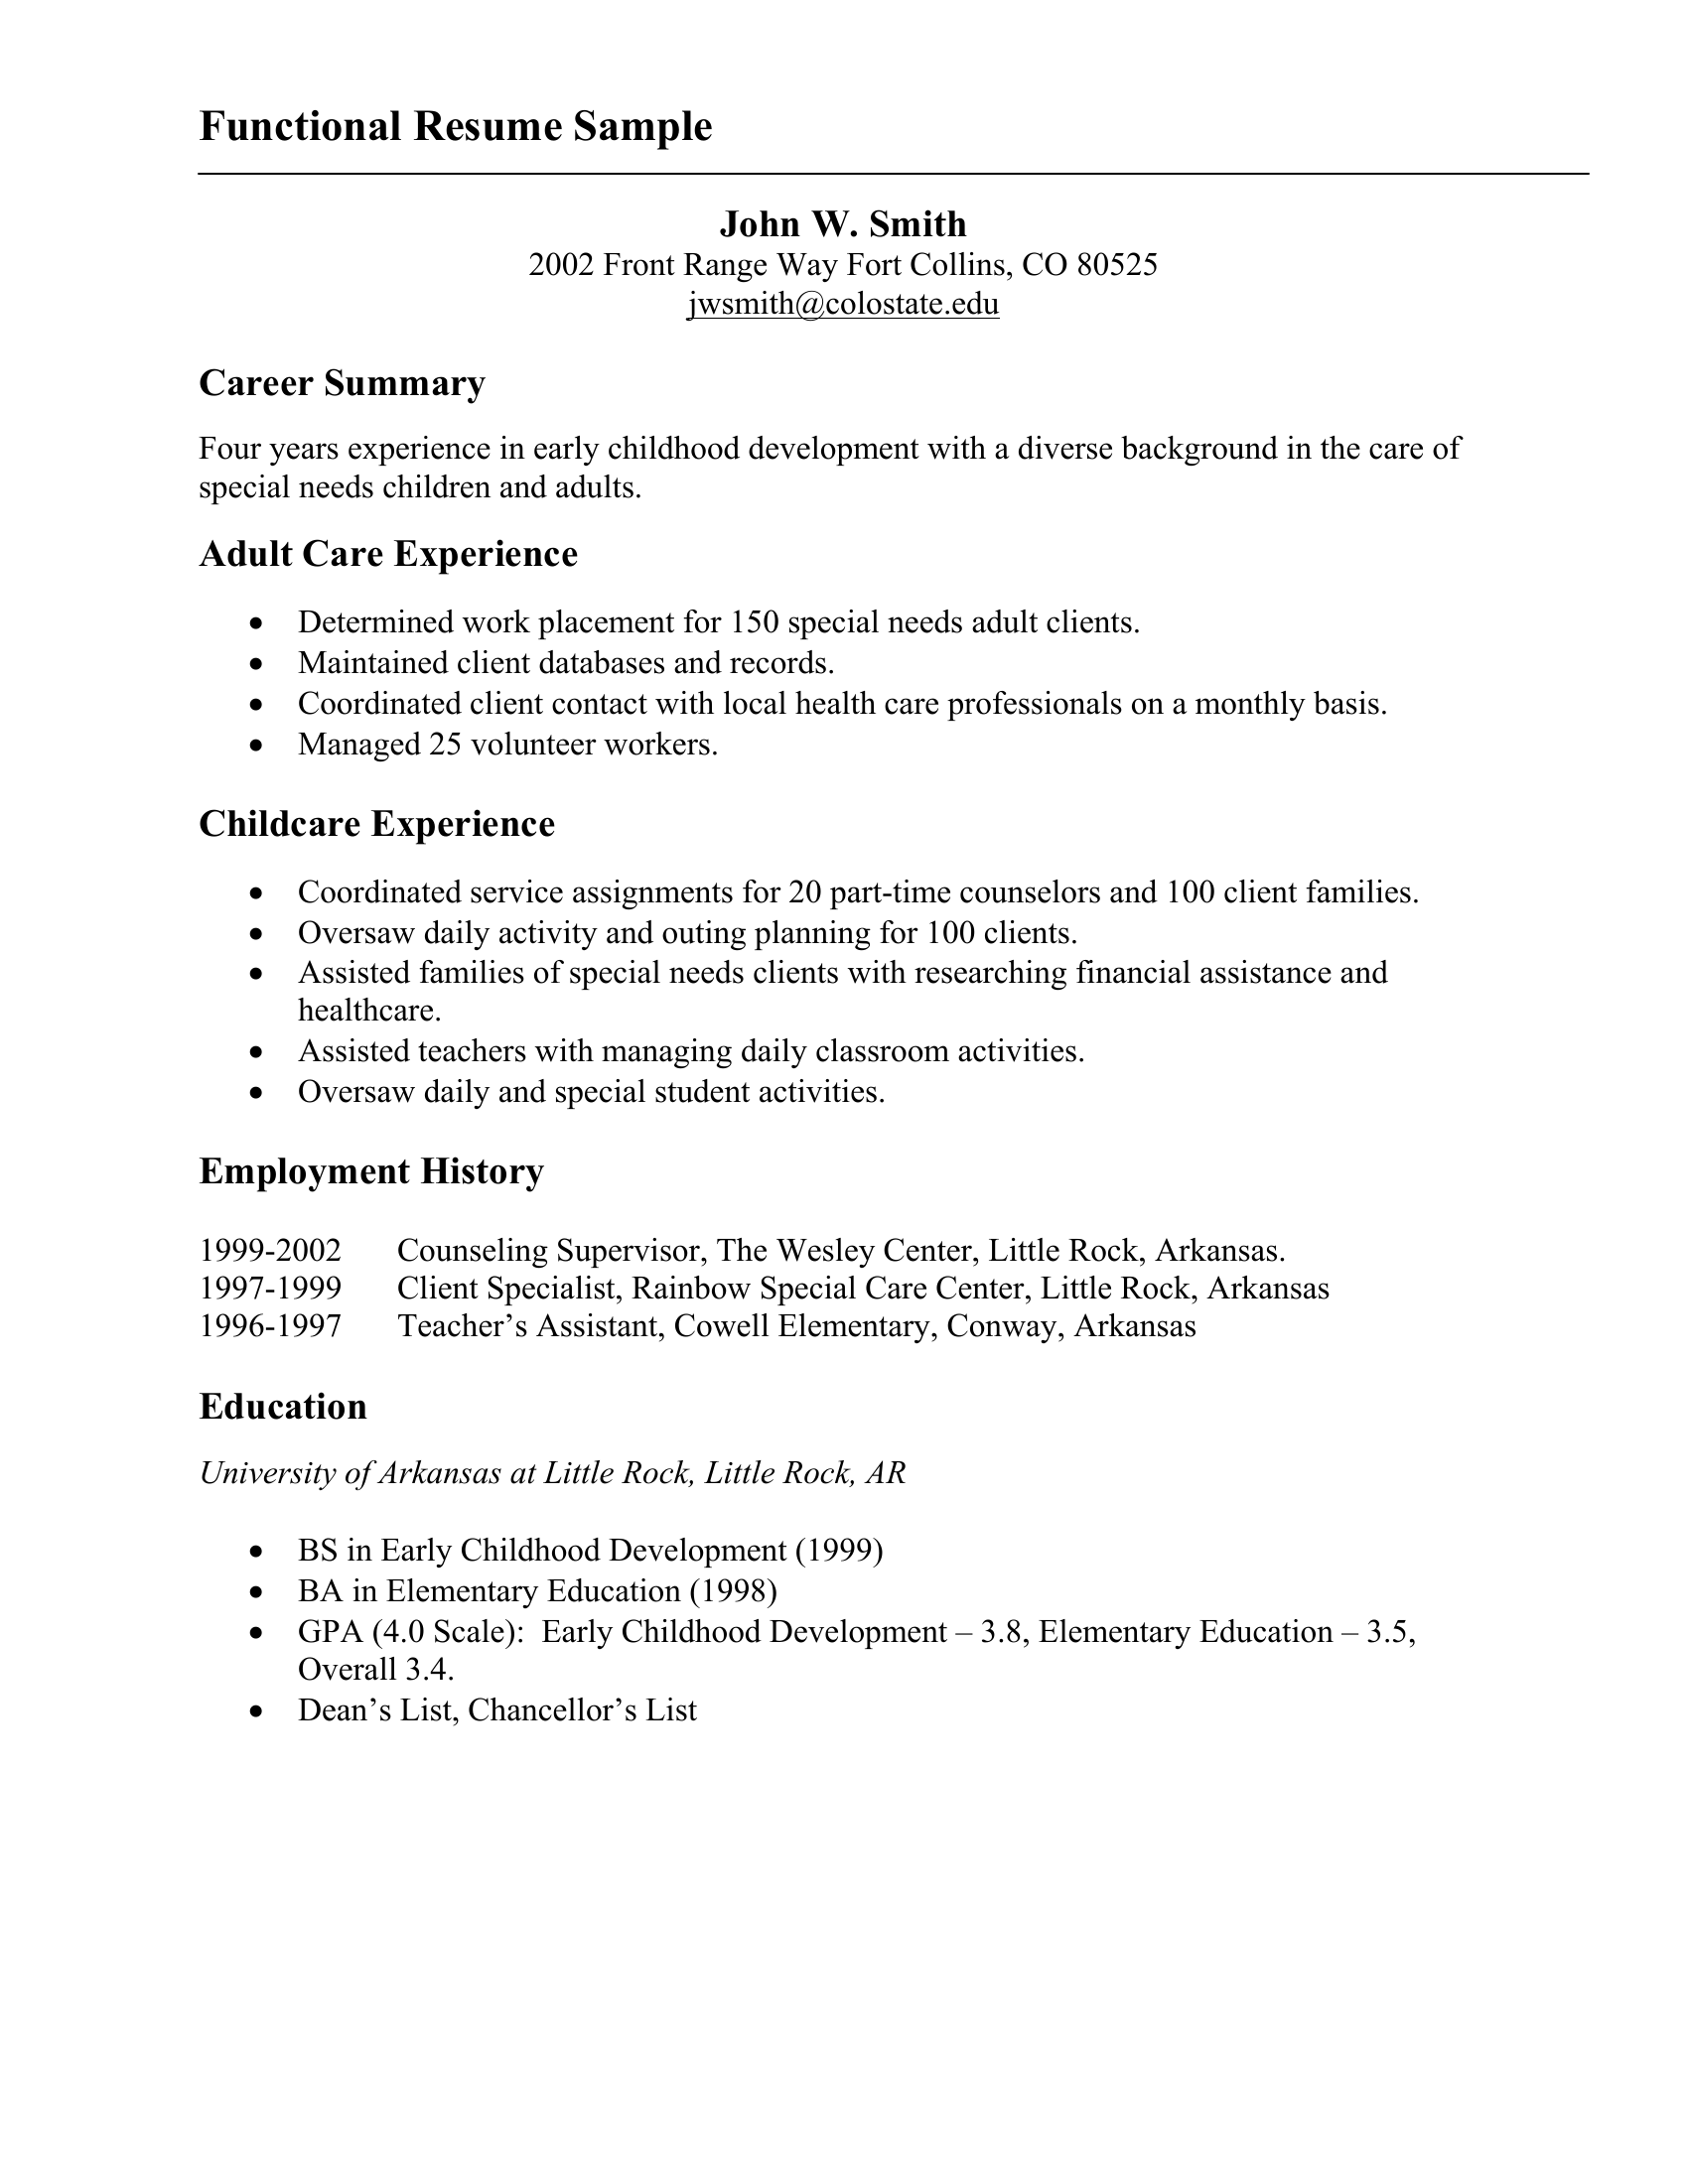

In [21]:
from IPython.display import display, Image
display(images[0])

In [22]:
array = reader.readtext(np.array(images[0]),min_size=0, slope_ths=0.2,decoder='beamsearch')
array

[([[194, 102], [726, 102], [726, 159], [194, 159]],
  'Functional Resume Sample',
  0.9685980743671047),
 ([[721, 205], [861, 205], [861, 245], [721, 245]],
  'John W_',
  0.466785656306922),
 ([[873, 207], [979, 207], [979, 245], [873, 245]],
  'Smith',
  0.9860598603685115),
 ([[529, 247], [1171, 247], [1171, 291], [529, 291]],
  '2002 Front Range Way Fort Collins, CO 80525',
  0.8755310667482396),
 ([[688, 285], [1013, 285], [1013, 327], [688, 327]],
  'iwsmith@colostate_edu',
  0.6196214802075118),
 ([[196, 362], [497, 362], [497, 414], [196, 414]],
  'Career Summary',
  0.9999405935145128),
 ([[196, 430], [1480, 430], [1480, 478], [196, 478]],
  'Four years experience in early childhood development with a diverse background in the care of',
  0.7469069390558439),
 ([[192, 467], [649, 467], [649, 519], [192, 519]],
  'special needs children and adults',
  0.9932633228544163),
 ([[198, 536], [590, 536], [590, 586], [198, 586]],
  'Adult Care Experience',
  0.9534088645751743),
 ([[2

In [23]:
array[0]

([[194, 102], [726, 102], [726, 159], [194, 159]],
 'Functional Resume Sample',
 0.9685980743671047)

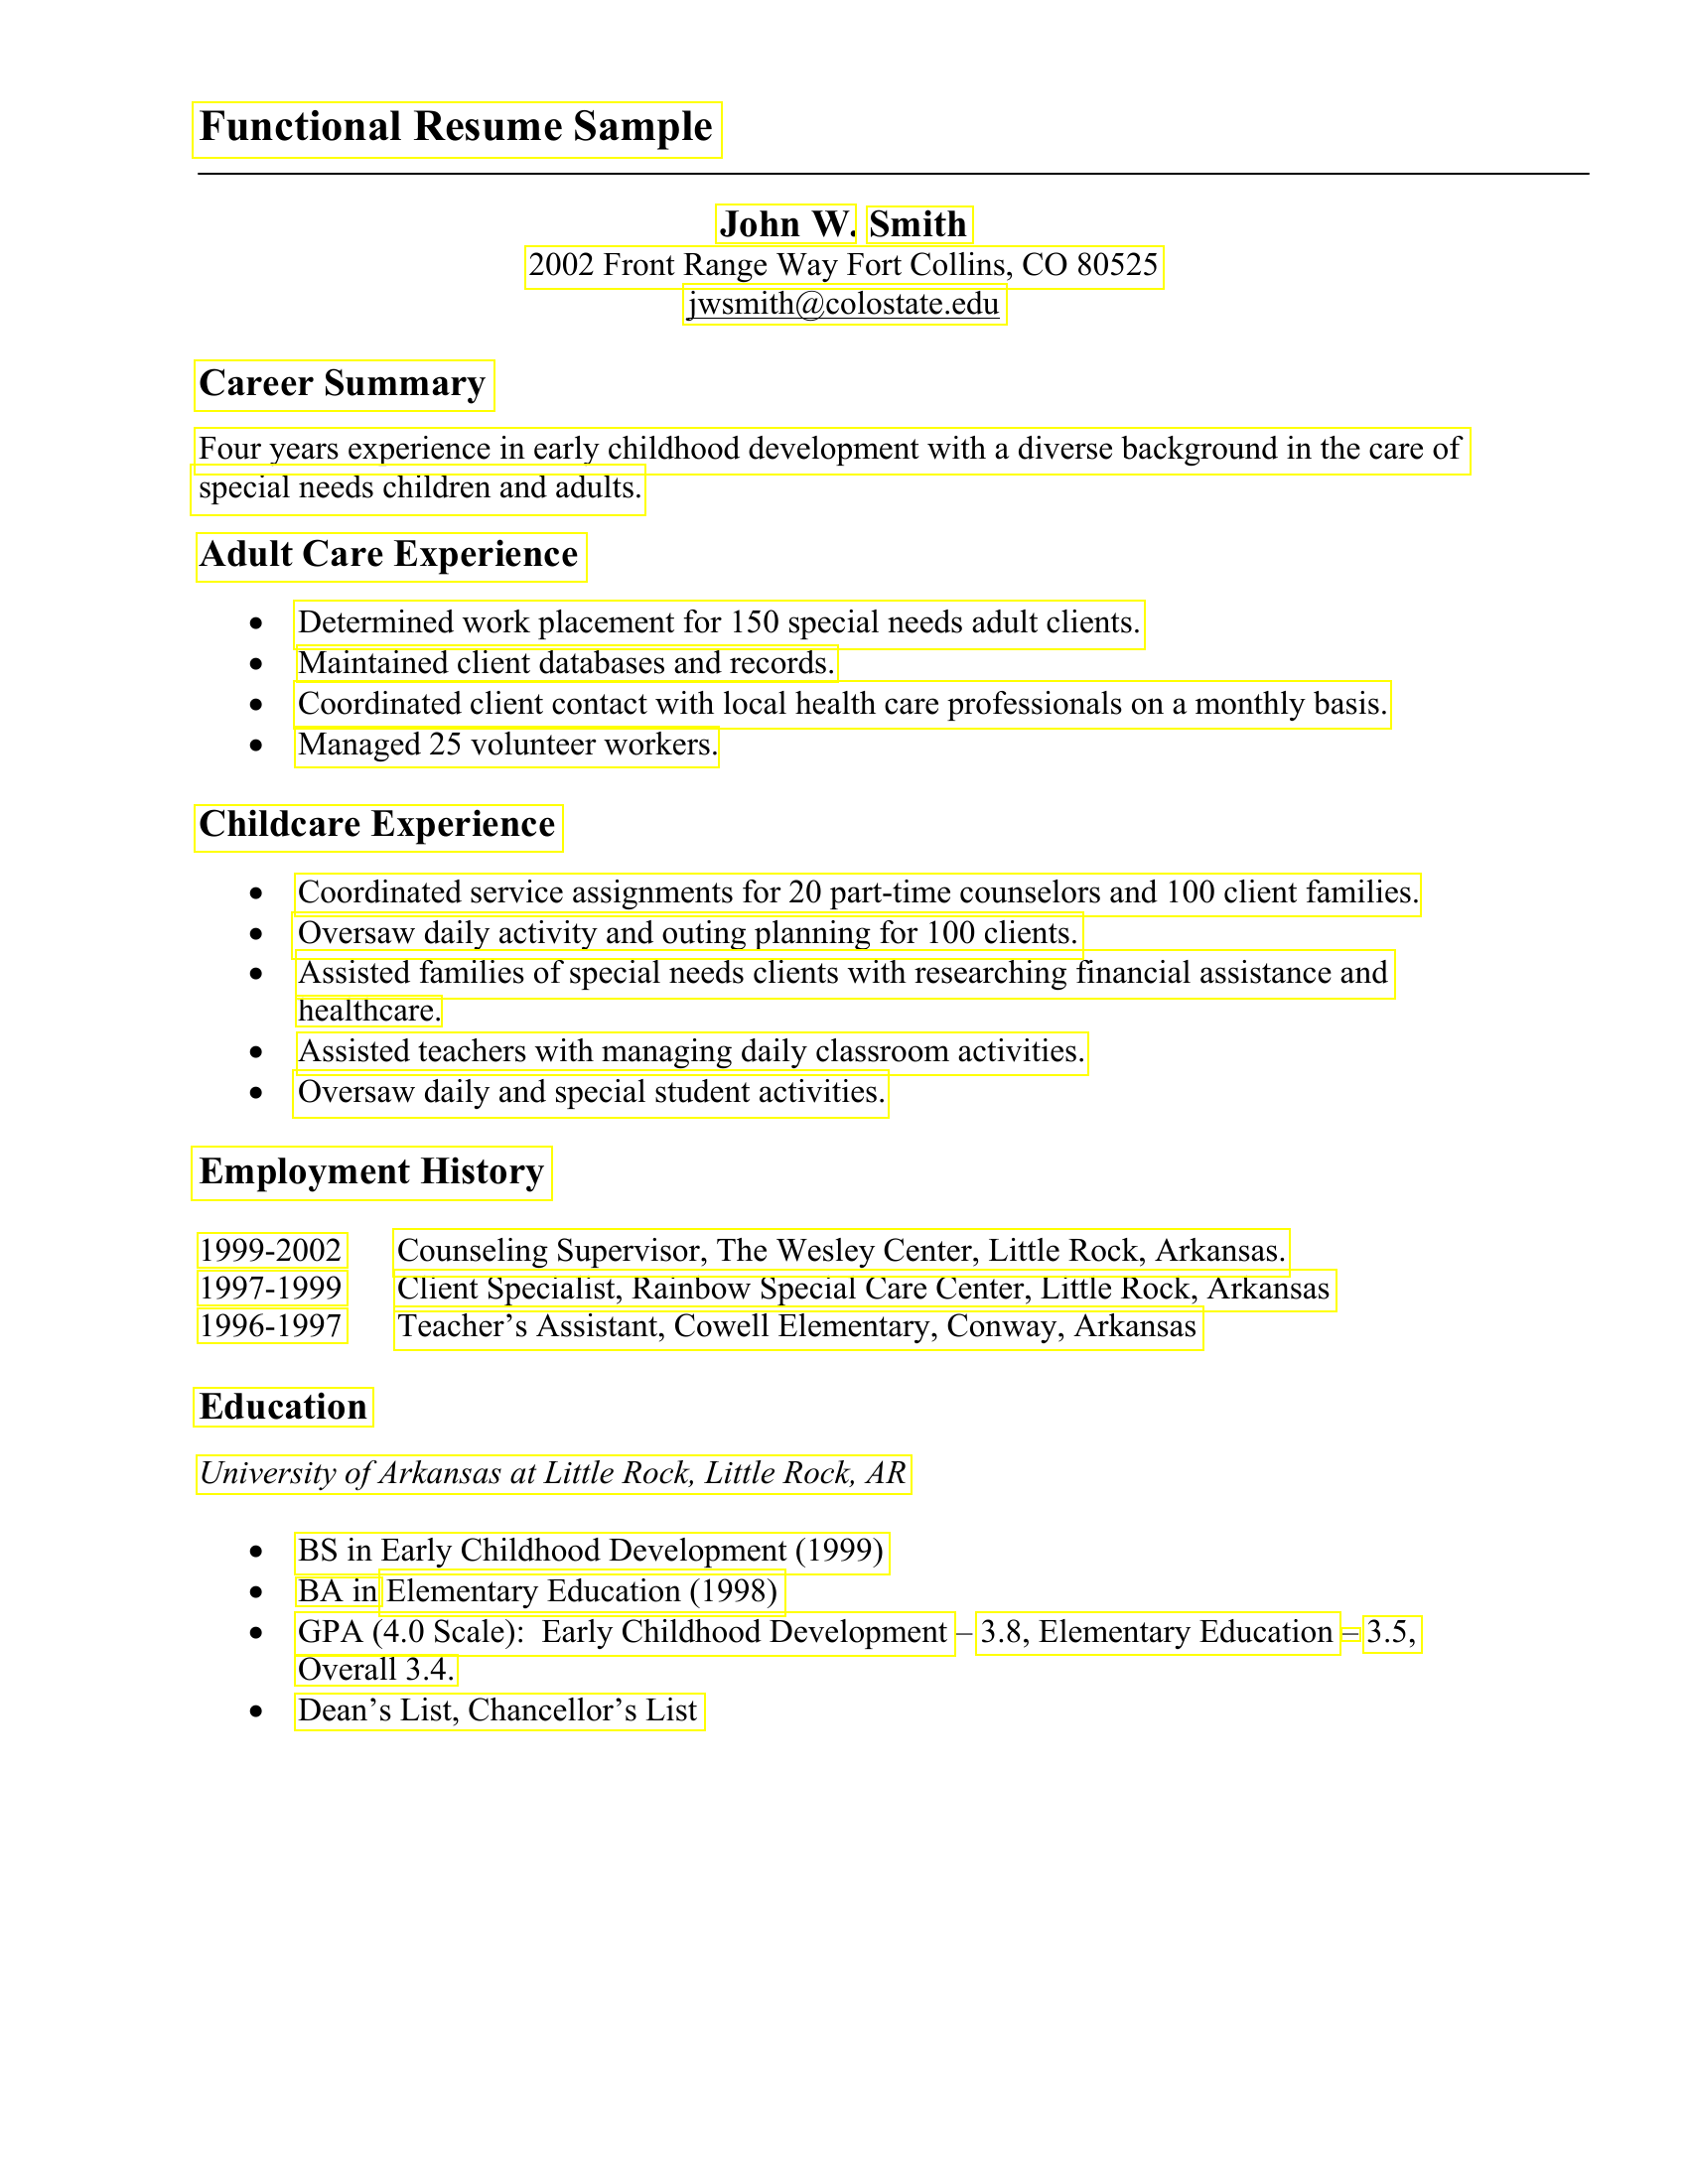

In [26]:
def draw_boxes(image, bounds, color='yellow', width=2):
  draw = ImageDraw.Draw(image)
  for arr in array:
    p0,p1,p2,p3 = arr[0]
    draw.line([*p0, *p1,*p2,*p3,*p0], fill= color, width = width)
  return image

draw_boxes(images[0], array)

In [27]:
array[1][1]

'John W_'

In [30]:
text=''
for i in range(len(array)):
  text = text + array[i][1] +'\n'

text

"Functional Resume Sample\nJohn W_\nSmith\n2002 Front Range Way Fort Collins, CO 80525\niwsmith@colostate_edu\nCareer Summary\nFour years experience in early childhood development with a diverse background in the care of\nspecial needs children and adults\nAdult Care Experience\nDetermined work placement for 150 special needs adult clients.\nMaintained client databases and records.\nCoordinated client contact with local health care professionals o a monthly basis.\nManaged 25 volunteer workers.\nChildcare Experience\nCoordinated service assignments for 20 part-time counselors and 100 client families\nOversaw daily activity and outing planning for 100 clients.\nAssisted families of special needs clients with researching financial assistance and\nhealthcare.\nAssisted teachers with managing daily classroom activities.\nOversaw daily and special student activities\nEmployment History\n1999-2002\nCounseling Supervisor; The Wesley Center, Little Rock Arkansas.\n1997-1999\nClient Specialist;

In [31]:
nlp = spacy.load('en_core_web_sm')

In [34]:
doc= nlp(text)
doc

Functional Resume Sample
John W_
Smith
2002 Front Range Way Fort Collins, CO 80525
iwsmith@colostate_edu
Career Summary
Four years experience in early childhood development with a diverse background in the care of
special needs children and adults
Adult Care Experience
Determined work placement for 150 special needs adult clients.
Maintained client databases and records.
Coordinated client contact with local health care professionals o a monthly basis.
Managed 25 volunteer workers.
Childcare Experience
Coordinated service assignments for 20 part-time counselors and 100 client families
Oversaw daily activity and outing planning for 100 clients.
Assisted families of special needs clients with researching financial assistance and
healthcare.
Assisted teachers with managing daily classroom activities.
Oversaw daily and special student activities
Employment History
1999-2002
Counseling Supervisor; The Wesley Center, Little Rock Arkansas.
1997-1999
Client Specialist; Rainbow Special Care Cen

In [35]:
from spacy import displacy
displacy.render(nlp(doc.text),style='ent', jupyter=True)